In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

%matplotlib inline
import seaborn as sns

In [2]:
redwineData = pd.read_csv("winequality-red.csv", sep= ";", header = 0)
redwineData.columns = redwineData.columns.map(lambda x: x.replace(" ", "_"))
whitewineData = pd.read_csv("winequality-white.csv", sep = ";", header =0)
whitewineData.columns = whitewineData.columns.map(lambda x: x.replace(" ", "_"))

In [5]:
redwineData.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
whitewineData.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
print('There are ', redwineData.shape[0], 'red wines in the dataset')
print('There are ', whitewineData.shape[0], 'white wines in the dataset')

There are  1599 red wines in the dataset
There are  4898 white wines in the dataset


In [8]:
print('The number of red wine rankings: ', redwineData.quality.nunique())
print('Unique red wine rankings: ', sorted(redwineData.quality.unique()))

print('The number of white wine rankings: ', whitewineData.quality.nunique())
print('Unique white wine ranking: ', sorted(whitewineData.quality.unique()))

The number of red wine rankings:  6
Unique red wine rankings:  [3, 4, 5, 6, 7, 8]
The number of white wine rankings:  7
Unique white wine ranking:  [3, 4, 5, 6, 7, 8, 9]


In [9]:
print('The average rating of red wine is: ', redwineData.quality.mean())
print('The median rating of red wine is: ', redwineData.quality.median())
print('The standard deviation of red wine ratings is: ', redwineData.quality.std())

The average rating of red wine is:  5.6360225140712945
The median rating of red wine is:  6.0
The standard deviation of red wine ratings is:  0.8075694397347023


In [10]:
print('The average rating of white wine is: ', whitewineData.quality.mean())
print('The median rating of white wine is: ', whitewineData.quality.median())
print('The standard deviation of white wine ratings is: ', whitewineData.quality.std())

The average rating of white wine is:  5.87790935075541
The median rating of white wine is:  6.0
The standard deviation of white wine ratings is:  0.8856385749678454


In [11]:
redwineData.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Here is the distribution of rankings: 
quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


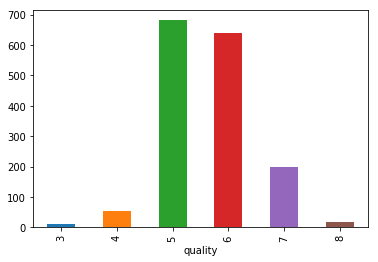

In [13]:
red_qual_count = redwineData.groupby('quality').size()
print('Here is the distribution of rankings: ')
print(red_qual_count)
red_qual_count.plot.bar()

fixed_acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile_acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric_acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual_sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free_sulfur_dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total_sulfur_dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

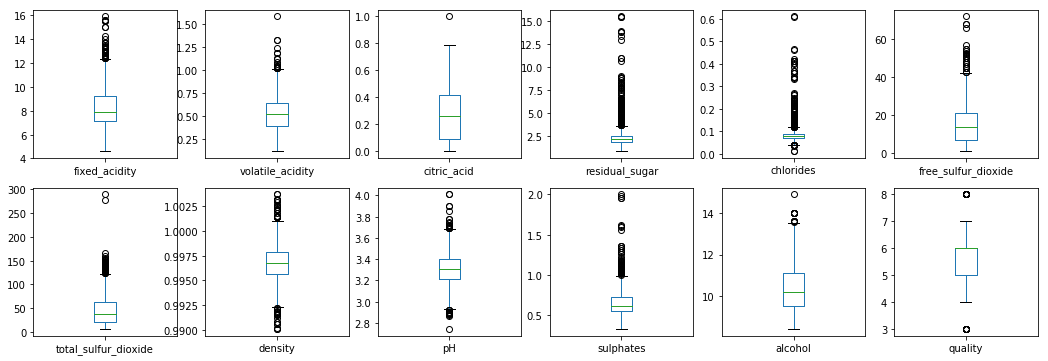

In [14]:
redwineData.plot.box(figsize=(18,6), subplots = True, layout=(2,6))

Here is the distribution of white wine rankings: 
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


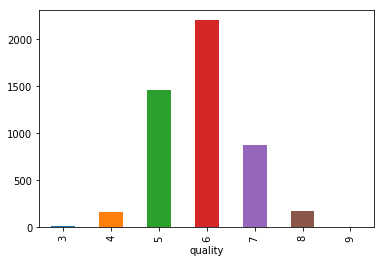

In [15]:
white_qual_count = whitewineData.groupby('quality').size()
print('Here is the distribution of white wine rankings: ')
print(white_qual_count)
white_qual_count.plot.bar()

fixed_acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile_acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric_acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual_sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free_sulfur_dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total_sulfur_dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

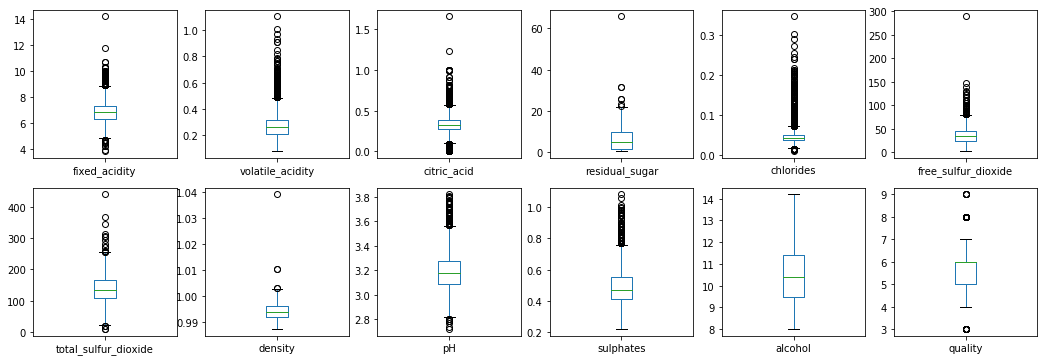

In [16]:
whitewineData.plot.box(subplots = True, figsize=(18,6), layout = (2,6))

In [17]:
red_qual_group = redwineData.groupby('quality')
red_qual_group.agg([np.mean, np.std, np.min, np.max])

fixed_acidity                      volatile_acidity                  \
                 mean       std amin  amax             mean       std  amin   
quality                                                                       
3            8.360000  1.770875  6.7  11.6         0.884500  0.331256  0.44   
4            7.779245  1.626624  4.6  12.5         0.693962  0.220110  0.23   
5            8.167254  1.563988  5.0  15.9         0.577041  0.164801  0.18   
6            8.347179  1.797849  4.7  14.3         0.497484  0.160962  0.16   
7            8.872362  1.992483  4.9  15.6         0.403920  0.145224  0.12   
8            8.566667  2.119656  5.0  12.6         0.423333  0.144914  0.26   

               citric_acid            ...     pH       sulphates            \
          amax        mean       std  ...   amin  amax      mean       std   
quality                               ...                                    
3        1.580    0.171000  0.250664  ...   3.16  3.63  0.570000  0.122020   
4        1.130    0.174151  0.201030  ...   2.74  3.90  0.596415  0.239391   
5        1.330    0.243686  0.180003  ...   2.88  3.74  0.620969  0.171062   
6        1.040    0.273824  0.195108  ...   2.86  4.01  0.675329  0.158650   
7        0.915    0.375176  0.194432  ...   2.92  3.78  0.741256  0.135639   
8        0.850    0.391111  0.199526  ...   2.88  3.72  0.767778  0.115379   

                       alcohol                       
         amin  amax       mean       std amin  amax  
quality                                              
3        0.40  0.86   9.955000  0.818009  8.4  11.0  
4        0.33  2.00  10.265094  0.934776  9.0  13.1  
5        0.37  1.98   9.899706  0.736521  8.5  14.9  
6        0.40  1.95  10.629519  1.049639  8.4  14.0  
7        0.39  1.36  11.465913  0.961933  9.2  14.0  
8        0.63  1.10  12.094444  1.224011  9.8  14.0  

[6 rows x 44 columns]

In [18]:
white_qual_group = whitewineData.groupby('quality')
white_qual_group.agg([np.mean, np.std, np.min, np.max])

fixed_acidity                      volatile_acidity                  \
                 mean       std amin  amax             mean       std  amin   
quality                                                                       
3            7.600000  1.724743  4.2  11.8         0.333250  0.140827  0.17   
4            7.129448  1.081490  4.8  10.2         0.381227  0.173463  0.11   
5            6.933974  0.838433  4.5  10.3         0.302011  0.100066  0.10   
6            6.837671  0.837442  3.8  14.2         0.260564  0.088142  0.08   
7            6.734716  0.755670  4.2   9.2         0.262767  0.091106  0.08   
8            6.657143  0.819337  3.9   8.2         0.277400  0.108029  0.12   
9            7.420000  0.983362  6.6   9.1         0.298000  0.057619  0.24   

               citric_acid            ...     pH       sulphates            \
          amax        mean       std  ...   amin  amax      mean       std   
quality                               ...                                    
3        0.640    0.336000  0.081460  ...   2.87  3.55  0.474500  0.119845   
4        1.100    0.304233  0.163857  ...   2.83  3.72  0.476135  0.117973   
5        0.905    0.337653  0.140814  ...   2.79  3.79  0.482203  0.098205   
6        0.965    0.338025  0.119325  ...   2.72  3.81  0.491106  0.113357   
7        0.760    0.325625  0.079183  ...   2.84  3.82  0.503102  0.130195   
8        0.660    0.326514  0.085439  ...   2.94  3.59  0.486229  0.147073   
9        0.360    0.386000  0.082037  ...   3.20  3.41  0.466000  0.092628   

                       alcohol                        
         amin  amax       mean       std  amin  amax  
quality                                               
3        0.28  0.74  10.345000  1.224089   8.0  12.6  
4        0.25  0.87  10.152454  1.003217   8.4  13.5  
5        0.27  0.88   9.808840  0.847065   8.0  13.6  
6        0.23  1.06  10.575372  1.147776   8.5  14.0  
7        0.22  1.08  11.367936  1.246536   8.6  14.2  
8        0.25  0.95  11.636000  1.280138   8.5  14.0  
9        0.36  0.61  12.180000  1.013410  10.4  12.9  

[7 rows x 44 columns]

In [19]:
redwineData.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


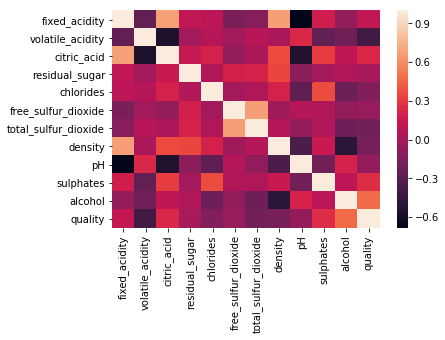

In [52]:
red_correclations = redwineData.corr()
sns.heatmap(red_correclations)

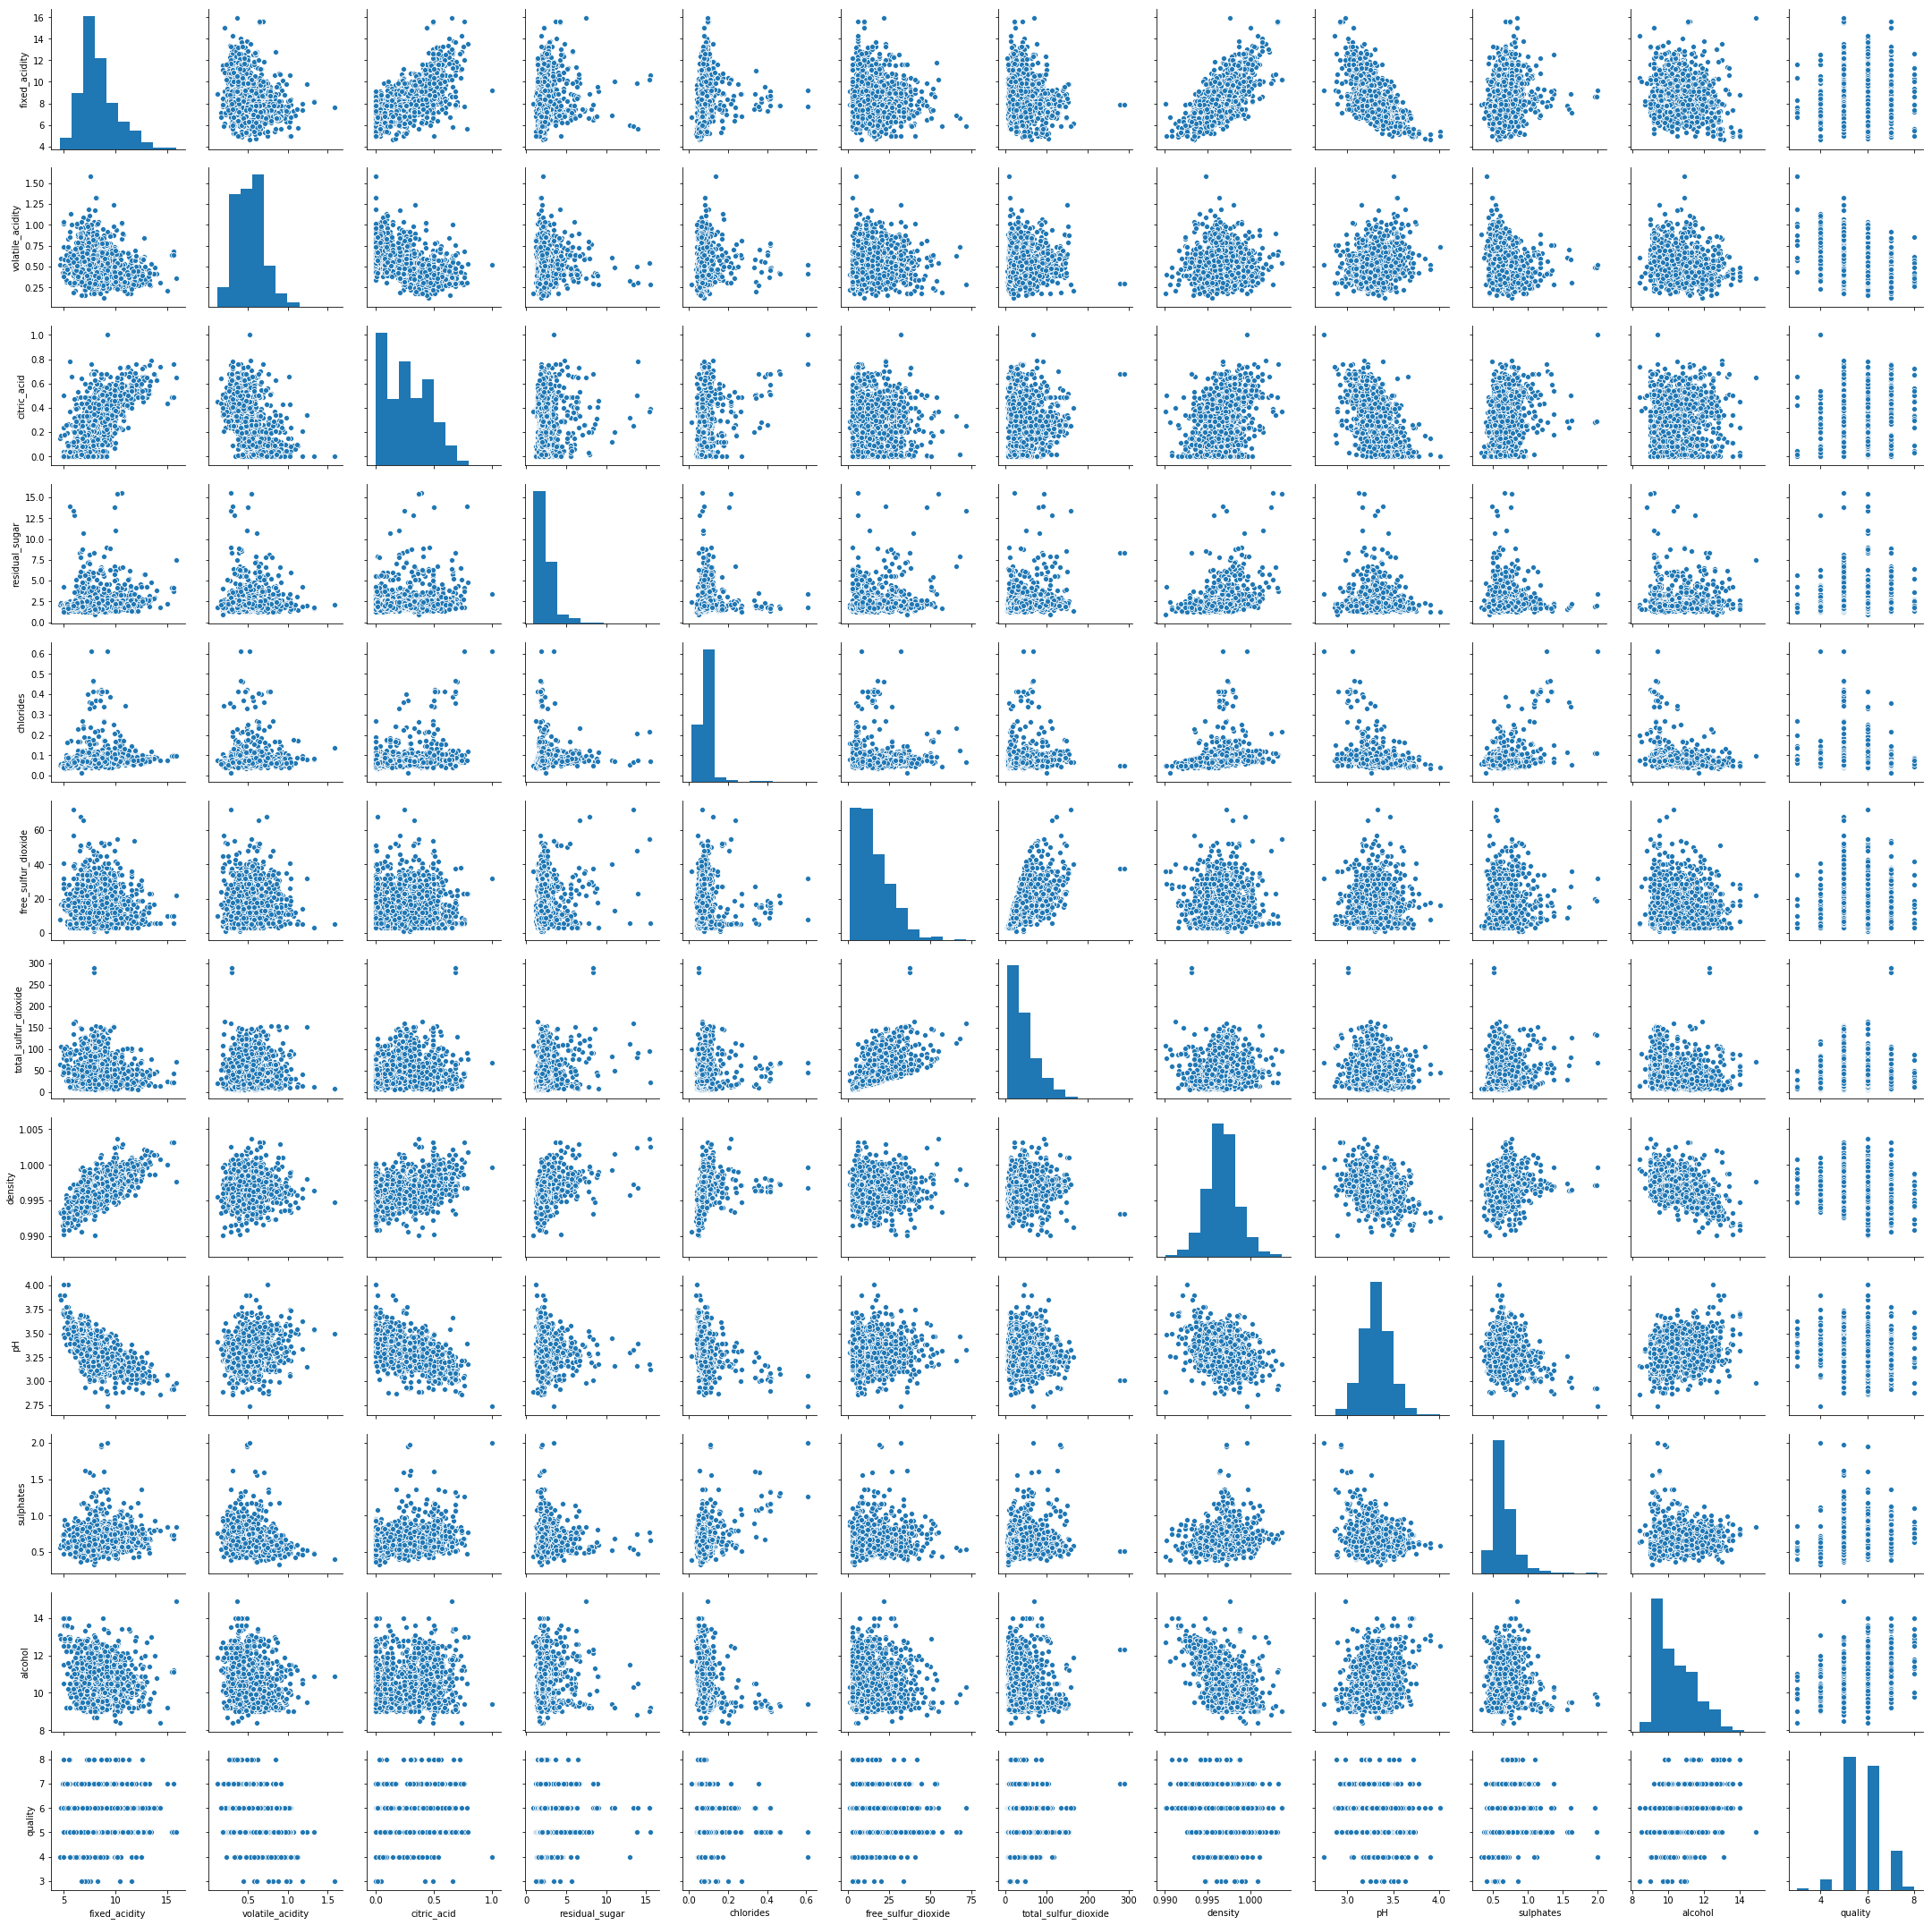

In [54]:
sns.pairplot(redwineData)

In [21]:
whitewineData.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


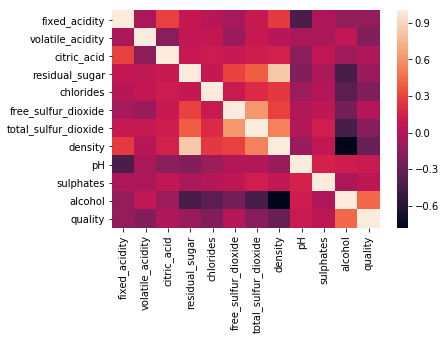

In [53]:
white_correlations = whitewineData.corr()
sns.heatmap(white_correlations)

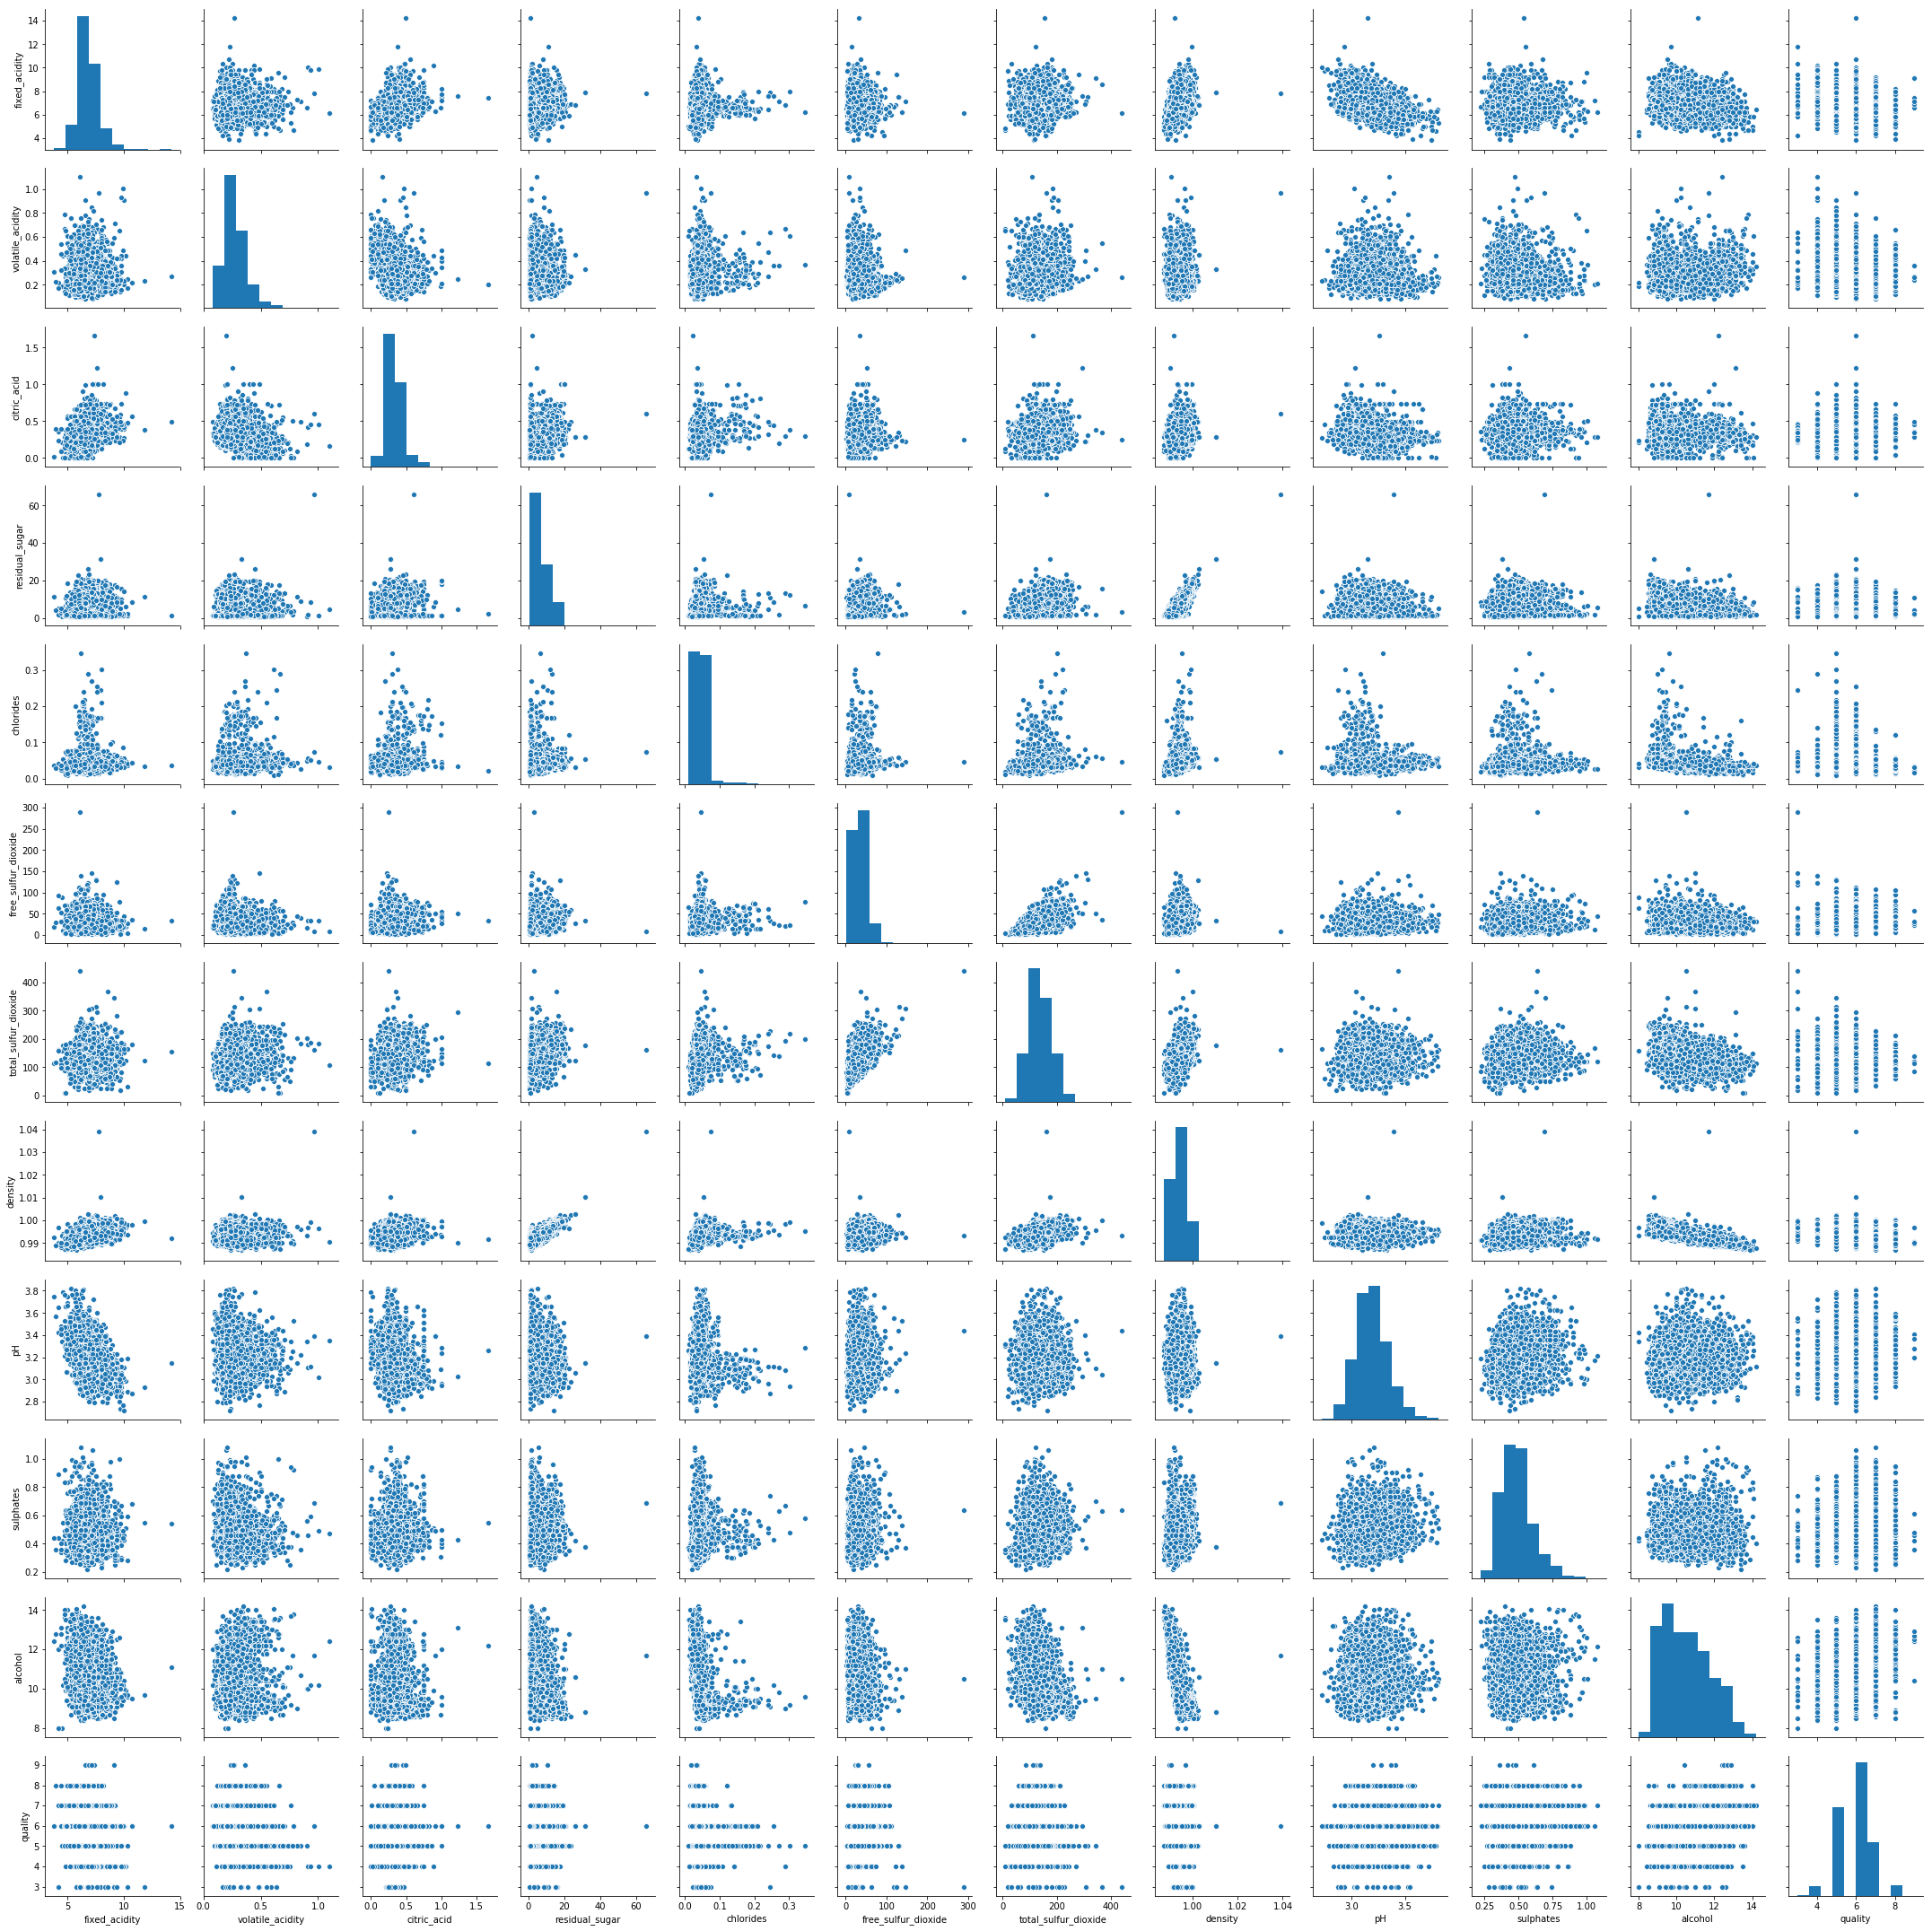

In [55]:
sns.pairplot(whitewineData)

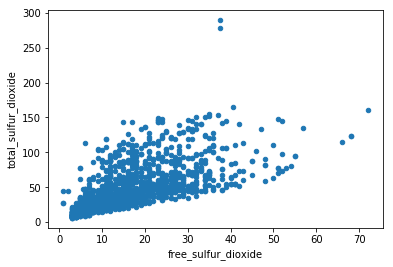

In [74]:
redwineData.plot.scatter(x='free_sulfur_dioxide', y='total_sulfur_dioxide')

In [22]:
#redcrappyRatingMask = redwineData.quality < 5
#crappyreds = redwineData[redcrappyRatingMask]
#crappyreds.shape

(63, 12)

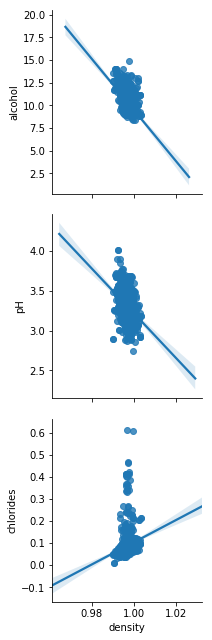

In [15]:
sns.pairplot(redwineData, y_vars=['alcohol', 'pH', 'chlorides'], x_vars='density', height=3, kind = 'reg')

In [58]:
# Creating X and y
feature_cols = ['alcohol', 'sulphates' ]
X_red= redwineData[feature_cols]
y_red= redwineData.quality

#Instantiating Linear Regression
alc_sulph_linreg = LinearRegression()
alc_sulph_linreg.fit(X_red,y_red)

# Intercept and Coefficients

print("The y intercept:", alc_sulph_linreg.intercept_)
print("The coefficients:", alc_sulph_linreg.coef_)

The y intercept: 1.3749667389943259
The coefficients: [0.34604233 0.99409492]


In [42]:
alc_sulph_linreg.predict([[13, 2.0, 6]])

array([6.0380838])

In [33]:
redwineData.sulphates.max()
redwineData.alcohol.max()

14.9

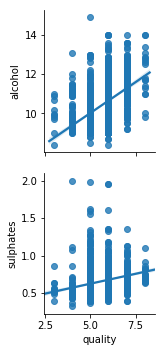

In [38]:
sns.pairplot(redwineData, y_vars=['alcohol', 'sulphates'], x_vars='quality', kind='reg')

In [59]:
y_pred_red = alc_sulph_linreg.predict(X_red)
metrics.r2_score(y_red, y_pred_red)

0.26989124017270794

In [63]:
print('RMSE is: ', np.sqrt(metrics.mean_squared_error(y_red, y_pred_red)))

RMSE is:  0.6898232233262751


In [61]:
# Splitting red wine data into Training and Testing Data Sets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=.3, random_state=1)
print('Training data size: ', X_red_train.shape)
print('Testing data size: ', X_red_test.shape)

Training data size:  (1119, 2)
Testing data size:  (480, 2)


In [65]:
#Red wine linreg with training and testing data

red_linreg2 = LinearRegression()
red_linreg2.fit(X_red_train, y_red_train)

y_red_pred_train = red_linreg2.predict(X_red_train)
print('The RMSE on training data is: ', np.sqrt(metrics.mean_squared_error(y_red_train, y_red_pred_train)))

y_red_pred_test = red_linreg2.predict(X_red_test)
print('The RMSE on testing data is: ', np.sqrt(metrics.mean_squared_error(y_red_test, y_red_pred_test)))

The RMSE on training data is:  0.6979959928795606
The RMSE on testing data is:  0.6707500355032784


In [90]:
redwineData.columns[0:-1]

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [109]:
logreg = LogisticRegression(C = 1e9, solver = 'newton-cg', multi_class='multinomial')
feature_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide','density',
       'pH', 'sulphates', 'alcohol']
X = redwineData[feature_cols]
y= redwineData.quality
logreg.fit(X,y)
outcome_pred = logreg.predict(X)
outcome_pred

/Users/Justin/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


array([5, 5, 5, ..., 6, 6, 6])

In [110]:
metrics.accuracy_score(y, outcome_pred)

0.6097560975609756